In [69]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [23]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2019 = combine_csv_files(folder_path_2019)


# folder_path_2020 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2020 = combine_csv_files(folder_path_2020)


# folder_path_2021 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2021 = combine_csv_files(folder_path_2021)

# combined_df = pd.concat([combined_df_2019, combined_df_2020, combined_df_2021], ignore_index=True)


In [2]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = 'C://Users//Facu//Downloads//EE_Malambique2'
combined_df = combine_csv_files(folder_path_2019)

In [106]:
combined_df = pd.read_csv(r"C:\Users\Facu\Downloads\Datos_RF_2021_nuevo_mask.csv")

In [107]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23100 entries, 0 to 23099
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    23100 non-null  int64  
 1   B11             23100 non-null  float64
 2   B12             23100 non-null  float64
 3   B2              23100 non-null  float64
 4   B3              23100 non-null  float64
 5   B4              23100 non-null  float64
 6   B8              23100 non-null  float64
 7   CH              23100 non-null  float64
 8   EVI             23100 non-null  float64
 9   MNDWI           23100 non-null  float64
 10  NDBI            23100 non-null  float64
 11  NDVI            23100 non-null  float64
 12  RVI             23100 non-null  float64
 13  SAVI            23100 non-null  float64
 14  VH              23100 non-null  float64
 15  VH_Contrast     23100 non-null  float64
 16  VH_Correlation  23100 non-null  float64
 17  VH_Entropy      23100 non-null 

In [108]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23100 entries, 0 to 23099
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    23100 non-null  int64  
 1   B11             23100 non-null  float64
 2   B12             23100 non-null  float64
 3   B2              23100 non-null  float64
 4   B3              23100 non-null  float64
 5   B4              23100 non-null  float64
 6   B8              23100 non-null  float64
 7   CH              23100 non-null  float64
 8   EVI             23100 non-null  float64
 9   MNDWI           23100 non-null  float64
 10  NDBI            23100 non-null  float64
 11  NDVI            23100 non-null  float64
 12  RVI             23100 non-null  float64
 13  SAVI            23100 non-null  float64
 14  VH              23100 non-null  float64
 15  VH_Contrast     23100 non-null  float64
 16  VH_Correlation  23100 non-null  float64
 17  VH_Entropy      23100 non-null 

In [109]:
# Filtrar los datos cuyo valor en la columna 'threshold' sea menor que 50
df_filtered = combined_df[combined_df['threshold'] < 50]
# Asignar valor de 0 a la columna 'agbd' donde 'label' es igual a 0
df_filtered.loc[df_filtered['label'] == 0, 'agbd'] = 0
# Asignar valor de 0 a la columna 'agbd' donde 'label' es igual a 0
df_filtered.loc[df_filtered['label'] == 6, 'agbd'] = 0

df_filtered.describe()

,system:index,B11,B12,B2,B3,B4,B8,CH,EVI,MNDWI,...,VV_Inertia,VV_minus_VH,VV_plus_VH,agbd,agbd_se,aspect,elevation,label,slope,threshold
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,...,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000
mean,9940.374336,1631.090958,868.573208,267.744985,455.129935,368.970419,2844.336968,12.730229,2.051939,-0.569622,...,2.017003,5.830126,-26.180481,120.310053,9.150679,148.421509,25.412680,1.496963,2.731993,17.069795
std,6939.398471,575.573584,487.073403,168.318506,212.425609,250.559417,478.358052,9.783706,0.404066,0.056513,...,1.854316,0.755037,3.094956,135.749919,4.920059,105.917949,12.445375,1.255822,1.895865,13.698860
min,64.000000,286.500000,171.000000,91.500000,140.000000,103.000000,140.500000,0.000000,-3.008475,-0.708029,...,0.300000,-3.408701,-42.828252,0.000000,2.981795,-0.000000,-1.000000,0.000000,0.000000,0.695588
25%,3343.250000,1141.500000,470.000000,168.500000,307.000000,204.625000,2494.250000,4.148166,1.841975,-0.596836,...,0.950625,5.433408,-27.644291,23.034298,2.989463,49.900816,16.000000,1.000000,1.436619,5.647369
50%,9256.500000,1489.750000,738.000000,216.500000,400.000000,291.000000,2880.000000,11.544067,2.135772,-0.576216,...,1.431932,5.794860,-25.571352,66.208210,13.087343,141.644390,25.000000,1.000000,2.202111,12.086199
75%,15740.500000,2008.250000,1137.625000,317.000000,550.000000,454.500000,3205.875000,22.747543,2.357956,-0.553630,...,2.375795,6.167668,-24.246988,181.042070,13.093409,240.299330,35.000000,1.000000,3.537267,27.384629
max,23063.000000,4503.000000,4355.000000,2736.000000,2825.000000,2857.000000,4166.500000,31.828161,2.889846,0.315607,...,19.924318,20.504193,-8.743997,1402.690800,13.183212,356.245880,61.000000,6.000000,16.278145,49.998455


In [110]:
def remove_outliers(df, column_name):

    # Calcular la media y la desviación estándar de la columna
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Calcular el umbral para identificar los outliers
    threshold = 3 * std_dev
    
    # Crear una condición para filtrar los outliers
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))
    
    # Crear un nuevo DataFrame con los outliers eliminados
    df_filtered = df[condition]
    
    return df_filtered


df_filtered_remove = remove_outliers(df_filtered, "agbd")

# Mostrar las primeras filas del DataFrame filtrado
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 64 to 23063
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    2598 non-null   int64  
 1   B11             2598 non-null   float64
 2   B12             2598 non-null   float64
 3   B2              2598 non-null   float64
 4   B3              2598 non-null   float64
 5   B4              2598 non-null   float64
 6   B8              2598 non-null   float64
 7   CH              2598 non-null   float64
 8   EVI             2598 non-null   float64
 9   MNDWI           2598 non-null   float64
 10  NDBI            2598 non-null   float64
 11  NDVI            2598 non-null   float64
 12  RVI             2598 non-null   float64
 13  SAVI            2598 non-null   float64
 14  VH              2598 non-null   float64
 15  VH_Contrast     2598 non-null   float64
 16  VH_Correlation  2598 non-null   float64
 17  VH_Entropy      2598 non-null   floa

In [111]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 64 to 23063
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    2598 non-null   int64  
 1   B11             2598 non-null   float64
 2   B12             2598 non-null   float64
 3   B2              2598 non-null   float64
 4   B3              2598 non-null   float64
 5   B4              2598 non-null   float64
 6   B8              2598 non-null   float64
 7   CH              2598 non-null   float64
 8   EVI             2598 non-null   float64
 9   MNDWI           2598 non-null   float64
 10  NDBI            2598 non-null   float64
 11  NDVI            2598 non-null   float64
 12  RVI             2598 non-null   float64
 13  SAVI            2598 non-null   float64
 14  VH              2598 non-null   float64
 15  VH_Contrast     2598 non-null   float64
 16  VH_Correlation  2598 non-null   float64
 17  VH_Entropy      2598 non-null   floa

In [112]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index','agbd_se', 'threshold']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 64 to 23063
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   B11             2598 non-null   float64
 1   B12             2598 non-null   float64
 2   B2              2598 non-null   float64
 3   B3              2598 non-null   float64
 4   B4              2598 non-null   float64
 5   B8              2598 non-null   float64
 6   CH              2598 non-null   float64
 7   EVI             2598 non-null   float64
 8   MNDWI           2598 non-null   float64
 9   NDBI            2598 non-null   float64
 10  NDVI            2598 non-null   float64
 11  RVI             2598 non-null   float64
 12  SAVI            2598 non-null   float64
 13  VH              2598 non-null   float64
 14  VH_Contrast     2598 non-null   float64
 15  VH_Correlation  2598 non-null   float64
 16  VH_Entropy      2598 non-null   float64
 17  VH_Inertia      2598 non-null   floa

In [113]:
# Obtener los nombres de las columnas excepto 'agbd' y '.geo'
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]

# Mostrar la lista de características
print(features)

['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'agbd', 'aspect', 'elevation', 'label', 'slope']


In [78]:
feature_names =  ['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'agbd', 'aspect', 'elevation', 'label', 'slope']


optico = ['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'MNDWI', 'NDBI', 'NDVI',  'elevation', 'rh95','EVI', 'SAVI','slope']


radar = ['RVI', 'VV','VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation' , 'slope',  'rh95']


# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']


df_reduce = df_modified[feature_names]

In [114]:
# Separar la variable objetivo 'agbd'
y = df_modified['agbd']

# Separar las variables independientes (todas excepto 'agbd' y '.geo')
X = df_modified.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 64 to 23063
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   B11             2598 non-null   float64
 1   B12             2598 non-null   float64
 2   B2              2598 non-null   float64
 3   B3              2598 non-null   float64
 4   B4              2598 non-null   float64
 5   B8              2598 non-null   float64
 6   CH              2598 non-null   float64
 7   EVI             2598 non-null   float64
 8   MNDWI           2598 non-null   float64
 9   NDBI            2598 non-null   float64
 10  NDVI            2598 non-null   float64
 11  RVI             2598 non-null   float64
 12  SAVI            2598 non-null   float64
 13  VH              2598 non-null   float64
 14  VH_Contrast     2598 non-null   float64
 15  VH_Correlation  2598 non-null   float64
 16  VH_Entropy      2598 non-null   float64
 17  VH_Inertia      2598 non-null   floa

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 38.33047503237241
R^2 Score: 0.6275590168251983


In [116]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 71.65608367783405
R^2 Score: 0.5533877097312689


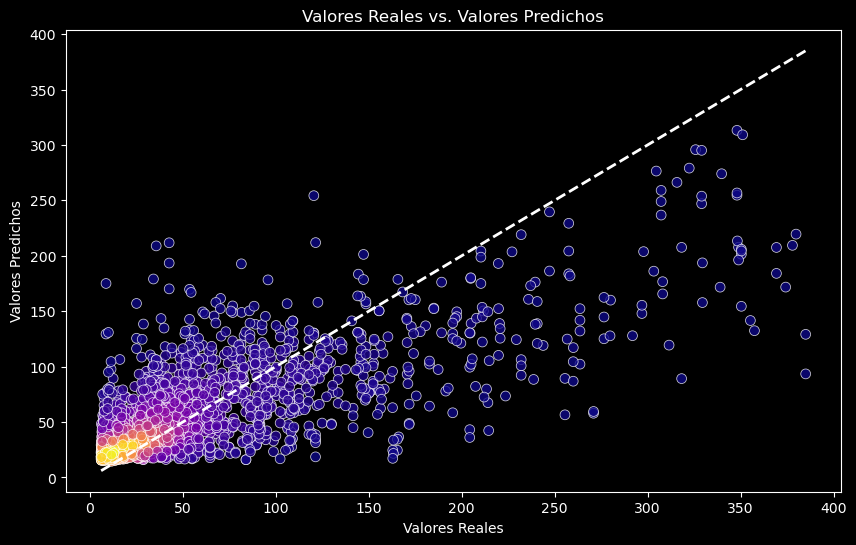

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

           Feature  Importance
6               CH    0.601023
5               B8    0.023027
23     VV_minus_VH    0.020557
2               B2    0.020185
7              EVI    0.019939
9             NDBI    0.019815
4               B4    0.019503
28           slope    0.018175
8            MNDWI    0.017847
1              B12    0.016997
26       elevation    0.016720
25          aspect    0.016696
3               B3    0.016273
0              B11    0.015045
11             RVI    0.014330
15  VH_Correlation    0.013941
21      VV_Entropy    0.013708
16      VH_Entropy    0.013555
20  VV_Correlation    0.012394
13              VH    0.011598
12            SAVI    0.010344
18              VV    0.010073
10            NDVI    0.009951
24      VV_plus_VH    0.009843
14     VH_Contrast    0.009327
19     VV_Contrast    0.008191
22      VV_Inertia    0.007276
17      VH_Inertia    0.007005
27           label    0.006662


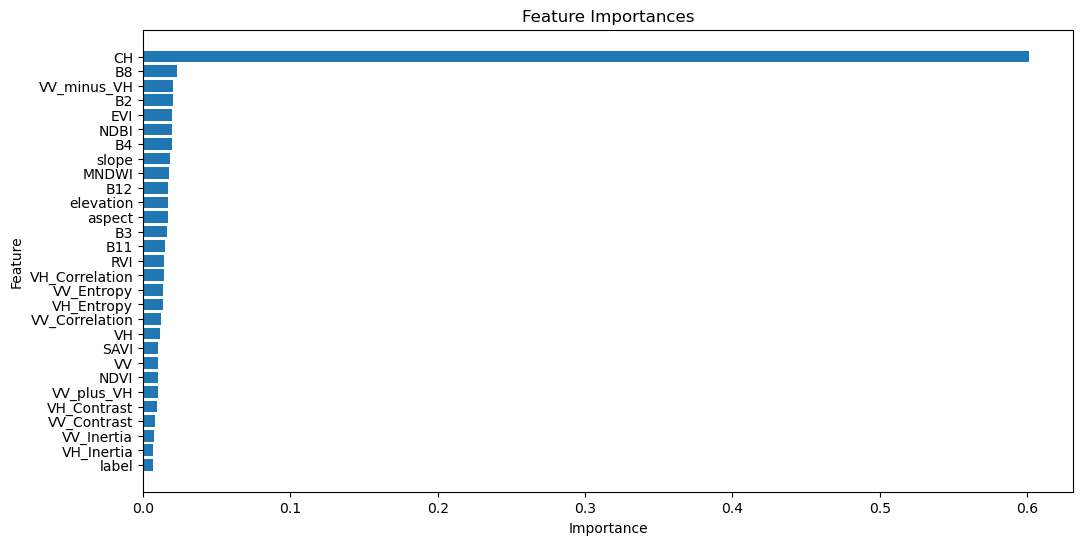

In [117]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [118]:
feature_names_reduced = ['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'aspect', 'elevation', 'label', 'slope']

# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [119]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_AGB_pampa2"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [22]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
    trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malambique"
export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malambique_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malambique_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malambique_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malambique_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malambique_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malambique_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malambique_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malambique_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malambique_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malambique_part_9


In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')